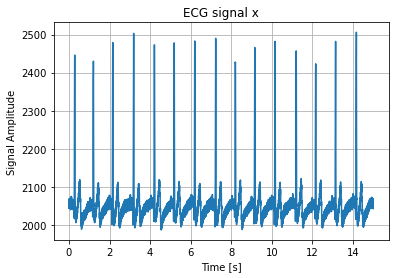

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import correlate

data = pandas.read_csv('ecg_data_nan.csv').to_numpy().flatten()
fs = 1000
Ts = 1/fs
N = data.shape[0]
Duration = N/fs

x = np.linspace(0, Duration - Ts, N)
fig, ax = plt.subplots()
ax.grid(True)
ax.set_title('ECG signal x')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal Amplitude')
ax.plot(x, data)

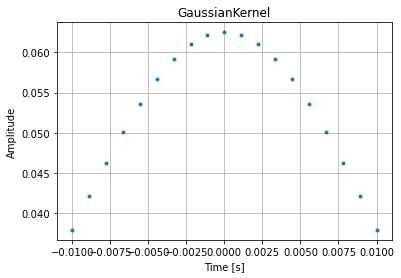

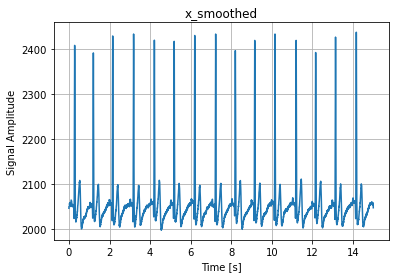

In [2]:
tg = np.linspace(-0.01, 0.01, 19)
sigma = 0.01
GaussianKernel = np.exp(-tg**2/(2*sigma**2))
GaussianKernel /= GaussianKernel.sum()

fig, ax = plt.subplots()
ax.grid(True)
ax.set_title('GaussianKernel')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.plot(tg, GaussianKernel, '.')

x_smoothed = correlate(data, GaussianKernel, mode='nearest')
fig, ax = plt.subplots()
ax.grid(True)
ax.set_title('x_smoothed')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal Amplitude')
ax.plot(x, x_smoothed)

<ipython-input-3-19bdd9b9cccc>:6: RuntimeWarning: invalid value encountered in greater
  return np.intersect1d(np.where(y>0), np.where(z>0))


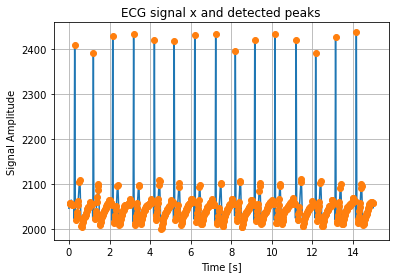

In [3]:
def peak_detector(x):
    h1 = [-1, 1, 0]
    h2 = [0, 1, -1]
    y = correlate(x, h1, mode='nearest')
    z = correlate(x, h2, mode='nearest')
    return np.intersect1d(np.where(y>0), np.where(z>0))

peaks = peak_detector(x_smoothed)
fig, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal Amplitude')
ax.set_title('ECG signal x and detected peaks')
ax.plot(x, x_smoothed)
ax.plot(x[peaks], x_smoothed[peaks], 'o')

2376.25


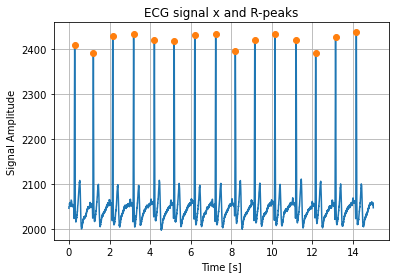

In [4]:
threshold = (max(data)+min(data))/2 + ((max(data)-min(data))/4) # ~25% lower than max
print(threshold)
peaks_t = peaks[x_smoothed[peaks] > threshold]

fig, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal Amplitude')
ax.set_title('ECG signal x and R-peaks')
ax.plot(x, x_smoothed)
ax.plot(x[peaks_t], x_smoothed[peaks_t], 'o')

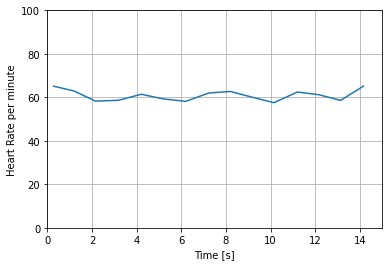

In [5]:
bpm = 60 / np.diff(x[peaks_t])
bpm = np.append(bpm, bpm[0])

fig, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Heart Rate per minute')
ax.axis([0, Duration, 0, 100])
ax.plot(x[peaks_t], bpm)

In [6]:
pandas.DataFrame({'R-peak':peaks_t,'heart-rate':bpm}).to_csv()

',R-peak,heart-rate\r\n0,283,65.14657980456026\r\n1,1204,62.89308176100629\r\n2,2158,58.25242718446601\r\n3,3188,58.65102639296187\r\n4,4211,61.41248720573187\r\n5,5188,59.28853754940709\r\n6,6200,58.13953488372093\r\n7,7232,61.983471074380226\r\n8,8200,62.695924764890236\r\n9,9157,60.12024048096196\r\n10,10155,57.52636625119841\r\n11,11198,62.434963579604556\r\n12,12159,61.22448979591834\r\n13,13139,58.59375000000005\r\n14,14163,65.14657980456026\r\n'